In [23]:
from google.colab import files
!pip install -q kaggle

# Upload the kaggle.json file
uploaded = files.upload()

# Move the kaggle.json file to the correct directory
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# Check if kaggle.json is in the correct directory
!ls /root/.kaggle/

# Download the dataset
!kaggle datasets download -d sachinkumar413/covid-pneumonia-normal-chest-xray-images


Saving kaggle.json to kaggle.json
kaggle.json
covid-pneumonia-normal-chest-xray-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import tensorflow as tf
print('Tensorflow: ',tf.__version__)

import keras
print('TF Keras:', keras.__version__)




import platform
print('Python:',platform.python_version())

Tensorflow:  2.14.0
TF Keras: 2.14.0
Python: 3.10.12


In [25]:
# Unzip the downloaded dataset
!unzip /content/covid-pneumonia-normal-chest-xray-images.zip


Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: COVID/COVID_1203.png    
  inflating: COVID/COVID_1204.png    
  inflating: COVID/COVID_1205.png    
  inflating: COVID/COVID_1206.png    
  inflating: COVID/COVID_1207.png    
  inflating: COVID/COVID_1208.png    
  inflating: COVID/COVID_1209.png    
  inflating: COVID/COVID_121.png     
  inflating: COVID/COVID_1210.png    
  inflating: COVID/COVID_1211.png    
  inflating: COVID/COVID_1212.png    
  inflating: COVID/COVID_1213.png    
  inflating: COVID/COVID_1214.png    
  inflating: COVID/COVID_1215.png    
  inflating: COVID/COVID_1216.png    
  inflating: COVID/COVID_1217.png    
  inflating: COVID/COVID_1218.png    
  inflating: COVID/COVID_1219.png    
  inflating: COVID/COVID_122.png     
  inflating: COVID/COVID_1220.png    
  inflating: COVID/COVID_1221.png    
  inflating: COVID/COVID_1222.png    
  inflating: COVID/COVID_1223.png    
  inflating: COVID/COVID_1224.png    
  inflating: COVID/CO

In [26]:
import os
import shutil
import random

# Rutas para cada carpeta
normal_dir = '/content/NORMAL/'
covid_dir = '/content/COVID/'
neumonia_dir = '/content/PNEUMONIA/'

# Directorios de salida para train y test
train_dir = '/content/train/'
test_dir = '/content/test/'

# Crear carpetas de train y test si no existen
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lista de clases
classes = ['normal', 'covid', 'neumonia']

# Proporción de imágenes para train (porcentaje)
train_ratio = 0.8

# Iterar sobre cada clase
for class_name in classes:
    class_path = eval(f'{class_name}_dir')  # Obtener la ruta de la carpeta actual
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    # Crear carpetas de train y test para cada clase
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Lista de imágenes en la clase
    images = os.listdir(class_path)

    # Calcular la cantidad de imágenes para train y test
    num_train = int(len(images) * train_ratio)

    # Dividir las imágenes entre train y test
    train_images = random.sample(images, num_train)
    test_images = list(set(images) - set(train_images))

    # Copiar imágenes a las carpetas correspondientes
    for image in train_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(train_class_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(test_class_dir, image))


In [27]:
import os
# Ruta de la carpeta de entrenamiento
train_folder = '/content/train/'

# Lista de clases
classes = os.listdir(train_folder)

# Imprime la cantidad de imágenes en cada clase
for class_label in classes:
    class_folder = os.path.join(train_folder, class_label)
    num_images = len(os.listdir(class_folder))
    print(f"Clase {class_label}: {num_images} imágenes")

Clase covid: 1300 imágenes
Clase normal: 1441 imágenes
Clase neumonia: 1440 imágenes


# 1. Cargar dataset de imagenes en memoria utilizando openCV

In [28]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [29]:
paths = ["/content/train/", "/content/test/"]

In [30]:
def imshow(img):
    fig,ax = plt.subplots(1,1,figsize=(8,8))
    ax.imshow(img,cmap='gray')

In [31]:
possible_labels=os.listdir(paths[0])

In [32]:
possible_labels

['covid', 'normal', 'neumonia']

In [33]:
data = []
for i, path in enumerate(paths):
    for label_int, label_string in enumerate(possible_labels):
        for filename in glob.glob(path + label_string + '/*.png'):
            print(f"Procesando imagen: {filename}")
            try:
                img = cv2.imread(filename)
                if img is not None:
                    resized_img = cv2.resize(img, (224, 224))
                    data.append([label_int, resized_img])
                else:
                    print(f"Error: No se pudo leer la imagen {filename}")
            except Exception as e:
                print(f"Error al procesar la imagen {filename}: {str(e)}")

print(f"Total de imágenes procesadas: {len(data)}")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Procesando imagen: /content/train/covid/COVID_645.png
Procesando imagen: /content/train/covid/COVID_1598.png
Procesando imagen: /content/train/covid/COVID_659.png
Procesando imagen: /content/train/covid/COVID_406.png
Procesando imagen: /content/train/covid/COVID_192.png
Procesando imagen: /content/train/covid/COVID_830.png
Procesando imagen: /content/train/covid/COVID_1086.png
Procesando imagen: /content/train/covid/COVID_1007.png
Procesando imagen: /content/train/covid/COVID_940.png
Procesando imagen: /content/train/covid/COVID_479.png
Procesando imagen: /content/train/covid/COVID_266.png
Procesando imagen: /content/train/covid/COVID_1081.png
Procesando imagen: /content/train/covid/COVID_813.png
Procesando imagen: /content/train/covid/COVID_1214.png
Procesando imagen: /content/train/covid/COVID_274.png
Procesando imagen: /content/train/covid/COVID_1226.png
Procesando imagen: /content/train/covid/COVID_146.png
Procesand

In [34]:
import random
random.Random(0).shuffle(data)

x_train=[]
y_train=[]

x_val=[]
y_val=[]

x_test=[]
y_test=[]

for i, sample in enumerate(data):
    label=sample[0]
    img=sample[1]
    if i<= 0.8*len(data):
        x_train.append(img)
        y_train.append(label)
    elif i>0.8*len(data) and i<=0.9*len(data):
        x_val.append(img)
        y_val.append(label)
    else:
        x_test.append(img)
        y_test.append(label)

x_train=np.array(x_train)
x_val=np.array(x_val)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [35]:
# Get unique labels and their counts in each set
train_labels, train_counts = np.unique(y_train, return_counts=True)
val_labels, val_counts = np.unique(y_val, return_counts=True)
test_labels, test_counts = np.unique(y_test, return_counts=True)

# Print the counts for each class
print("Train set:")
for label, count in zip(train_labels, train_counts):
    print(f"Class {label}: {count} images")

print("\nValidation set:")
for label, count in zip(val_labels, val_counts):
    print(f"Class {label}: {count} images")

print("\nTest set:")
for label, count in zip(test_labels, test_counts):
    print(f"Class {label}: {count} images")

Train set:
Class 0: 1283 images
Class 1: 1467 images
Class 2: 1433 images

Validation set:
Class 0: 172 images
Class 1: 167 images
Class 2: 184 images

Test set:
Class 0: 171 images
Class 1: 168 images
Class 2: 183 images


In [36]:
x_train.shape

(4183, 224, 224, 3)

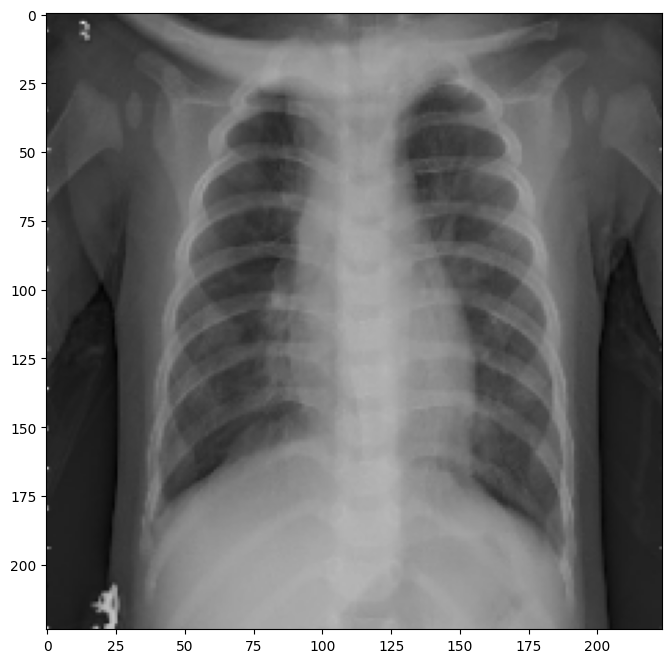

In [37]:
imshow(x_train[0])

In [38]:
y_train[0]

2

# 2. Definición y entrenamiento de la red neuronal convolucional

In [39]:
import tensorflow as tf
y_trainOneHot=tf.one_hot(y_train ,len(possible_labels))
y_valOneHot=tf.one_hot(y_val ,len(possible_labels))
y_testOneHot=tf.one_hot(y_test ,len(possible_labels))

In [67]:
y_trainOneHot

<tf.Tensor: shape=(4183, 3), dtype=float32, numpy=
array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [41]:
def cnn_model():
  model = Sequential()
  model.add(Convolution2D(32, (3, 3), input_shape = (224, 224,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [42]:
model=cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 30)                11828190  
                                                                 
 dense_1 (Dense)             (None, 3)                 93        
                                                                 
Total params: 11829179 (45.12 MB)
Trainable params: 11829179 (45.12 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [43]:

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('checkpoint/model.{epoch:d}.h5',save_best_only=False,save_freq='epoch')
tensorboard_callback = tf.keras.callbacks.TensorBoard('logs/cnn_logs', histogram_freq=1)

In [44]:
model.fit(x_train,
          y_trainOneHot,
          epochs=20,
          batch_size=100,
          validation_data=(x_val,y_valOneHot),
         # callbacks=[tensorboard_callback,checkpoint]
          )

Epoch 1/20
42/42 [==============================] - 11s 105ms/step - loss: 460245.9375 - accuracy: 0.5910 - val_loss: 1.6503 - val_accuracy: 0.6482
Epoch 2/20
42/42 [==============================] - 3s 70ms/step - loss: 1.5205 - accuracy: 0.6854 - val_loss: 1.4683 - val_accuracy: 0.6539
Epoch 3/20
42/42 [==============================] - 3s 73ms/step - loss: 0.7511 - accuracy: 0.7019 - val_loss: 1.4116 - val_accuracy: 0.6711
Epoch 4/20
42/42 [==============================] - 3s 66ms/step - loss: 0.6193 - accuracy: 0.7158 - val_loss: 1.4071 - val_accuracy: 0.6807
Epoch 5/20
42/42 [==============================] - 3s 69ms/step - loss: 0.5718 - accuracy: 0.7291 - val_loss: 1.3793 - val_accuracy: 0.6826
Epoch 6/20
42/42 [==============================] - 3s 75ms/step - loss: 0.5487 - accuracy: 0.7389 - val_loss: 1.3671 - val_accuracy: 0.6998
Epoch 7/20
42/42 [==============================] - 3s 65ms/step - loss: 0.5319 - accuracy: 0.7421 - val_loss: 1.3732 - val_accuracy: 0.7075
Epoch 

# 3. Predicción y Evaluación del modelo sobre el dataset de prueba

In [45]:
x_test[0:1].shape

(1, 224, 224, 3)

In [46]:
possible_labels[ np.argmax(model.predict(x_test[0:1])) ]

1/1 [==============================] - 0s 78ms/step


'neumonia'

In [47]:
model.evaluate(x=x_test,y=y_testOneHot)

17/17 [==============================] - 0s 11ms/step - loss: 0.9613 - accuracy: 0.7356


[0.9612584114074707, 0.7356321811676025]

# 4. Transfer Learning

In [48]:
!pip install tensorflow_hub

In [49]:
import tensorflow_hub as hubimport
import tensorflow_hub as hub


In [50]:
path_model="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [51]:
def tfLearning_model():
  model = Sequential()
  model.add(hub.KerasLayer(path_model,trainable=False))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  model.build([None,224,224,3])
  return model

In [52]:
model_tfLearning=tfLearning_model()

In [53]:
model_tfLearning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 30)                38430     
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 2296507 (8.76 MB)
Trainable params: 38523 (150.48 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [54]:
model_tfLearning.fit(x_train,
          y_trainOneHot,
          epochs=20,
          batch_size=100,
          validation_data=(x_val,y_valOneHot),
         # callbacks=[tensorboard_callback,checkpoint]
          )

Epoch 1/20
42/42 [==============================] - 15s 264ms/step - loss: 0.7470 - accuracy: 0.6904 - val_loss: 0.5446 - val_accuracy: 0.8088
Epoch 2/20
42/42 [==============================] - 5s 124ms/step - loss: 0.4951 - accuracy: 0.8362 - val_loss: 0.4617 - val_accuracy: 0.8585
Epoch 3/20
42/42 [==============================] - 5s 124ms/step - loss: 0.4314 - accuracy: 0.8558 - val_loss: 0.4037 - val_accuracy: 0.8757
Epoch 4/20
42/42 [==============================] - 5s 126ms/step - loss: 0.3965 - accuracy: 0.8695 - val_loss: 0.3736 - val_accuracy: 0.8872
Epoch 5/20
42/42 [==============================] - 5s 119ms/step - loss: 0.3603 - accuracy: 0.8821 - val_loss: 0.3699 - val_accuracy: 0.8681
Epoch 6/20
42/42 [==============================] - 5s 116ms/step - loss: 0.3408 - accuracy: 0.8857 - val_loss: 0.3629 - val_accuracy: 0.8681
Epoch 7/20
42/42 [==============================] - 5s 118ms/step - loss: 0.3215 - accuracy: 0.8922 - val_loss: 0.3383 - val_accuracy: 0.8891
Epoch

In [55]:
model_tfLearning.evaluate(x=x_test,y=y_testOneHot)

17/17 [==============================] - 1s 55ms/step - loss: 0.2669 - accuracy: 0.9080


[0.2668651044368744, 0.9080459475517273]

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report



y_pred = model_tfLearning.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_testOneHot, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred_classes)
print("\nClassification Report:")
print(class_report)


17/17 [==============================] - 1s 32ms/step
Confusion Matrix:
[[168   3   0]
 [  5 159   4]
 [  8  28 147]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       171
           1       0.84      0.95      0.89       168
           2       0.97      0.80      0.88       183

    accuracy                           0.91       522
   macro avg       0.91      0.91      0.91       522
weighted avg       0.91      0.91      0.91       522



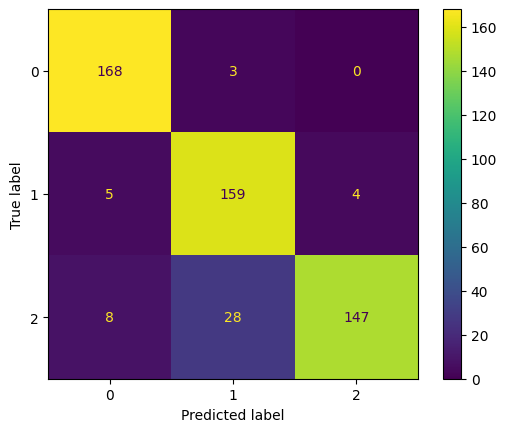

In [58]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix )
disp.plot()

In [59]:

conf_mat_norm=np.round(100*conf_matrix/np.sum(conf_matrix,1),1)

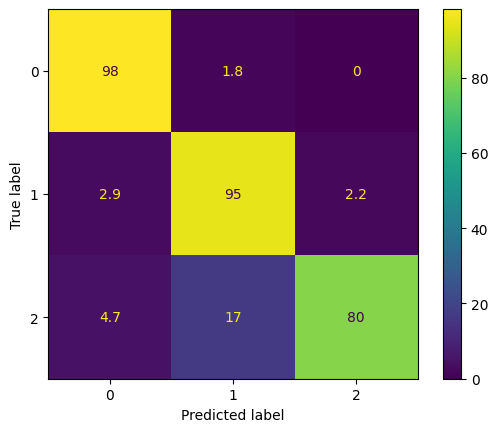

In [60]:
disp2=ConfusionMatrixDisplay(confusion_matrix=conf_mat_norm)
disp2.plot()


In [71]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Ruta de la imagen de prueba
test_image_path = "/content/NORMAL_1024.png"  # Reemplaza con la ruta de tu imagen

# Cargar la imagen y redimensionar a 224x224
test_image = image.load_img(test_image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Realizar la predicción
predictions = model_tfLearning.predict(test_image)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(predictions)

# Crear la etiqueta correspondiente a la predicción en formato one-hot encoding
predicted_label_one_hot = np.zeros_like(predictions)
predicted_label_one_hot[0, predicted_class_index] = 1

print("Predicted Label (One-Hot):", predicted_label_one_hot)



1/1 [==============================] - 0s 111ms/step
Predicted Label (One-Hot): [[0. 1. 0.]]


In [72]:
# Realizar la predicción
predictions = model_tfLearning.predict(test_image)

# Obtener el índice de la clase predicha
predicted_class_index = np.argmax(predictions)

# Obtener el nombre de la clase correspondiente al índice
predicted_class_name = class_labels[predicted_class_index]

print("Predicted Class:", predicted_class_name)


1/1 [==============================] - 0s 22ms/step
Predicted Class: normal


# CARGA MODELO

In [73]:
# Saving as Keras model in 2 separate files:
# Project main folder
project_folder = "/content/drive/MyDrive/tmp2/covid"

# 1. Model configuration (json file)
cnn_model_json = model_tfLearning.to_json()
with open(project_folder + "/model/tf2x/keras/split/covid_model_tf2.json","w") as json_file:
  json_file.write(cnn_model_json)

# 2. Model weights (h5 file)
model_tfLearning.save_weights(project_folder + "/model/tf2x/keras/split/covid_model_tf2.h5")
print("Modelo guardado en disco ...")

Modelo guardado en disco ...


In [ ]:
# Saving full model in a single file:

# Keras format
model_tfLearning.save(project_folder + "/model/tf2x/keras/full/covid_model_full_tf2.h5", save_format='h5')

# TF2.0 format
version_model="1"
model_tfLearning.save(project_folder + "/model/tf2x/tensorflow/" + version_model + "/", save_format='tf')

In [ ]:
model_name = model_tfLearning.name
print(f"Model Name: {model_name}")


# PREDICCIONES

In [75]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import tensorflow_hub as hub

# Ruta de la imagen de prueba en Colab (ajusta según sea necesario)
image_path = "/content/PNEUMONIA_1005.png"

# Cargar el modelo
MODEL_H5_FILE = "covid_model_full_tf2.h5"
MODEL_H5_PATH = "/content/drive/MyDrive/tmp2/covid/model/tf2x/keras/full/"  # Cambia la ruta según la ubicación de tu modelo
model_filename = MODEL_H5_PATH + MODEL_H5_FILE

# Etiquetas de clase procesadas mediante one-hot encoding
class_labels = ['covid', 'normal', 'neumonia']

# Agrega un bloque custom_object_scope para manejar la capa 'KerasLayer'
with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer}):
    loaded_model = load_model(MODEL_H5_PATH + MODEL_H5_FILE)

# Carga de la imagen
test_image = image.load_img(image_path, target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image.astype('float32')


# Realiza la predicción
predictions = loaded_model.predict(test_image)[0]

# Obtiene el índice de la clase predicha (el índice del valor máximo en las predicciones)
predicted_class_index = np.argmax(predictions)

# Obtiene el nombre de la clase correspondiente al índice
predicted_class_name = class_labels[predicted_class_index]

# Imprime solo el nombre de la clase predicha
print("Predicted Class:", predicted_class_name)


1/1 [==============================] - 0s 458ms/step
Predicted Class: neumonia


In [76]:
# Imprime las probabilidades para cada clase
for i, prob in enumerate(predictions):
    print(f"Probability for class {class_labels[i]}: {prob:.4f}")


Probability for class covid: 0.0149
Probability for class normal: 0.2333
Probability for class neumonia: 0.7519


In [77]:
# Obtiene el índice de la clase predicha (el índice del valor máximo en las predicciones)
predicted_class_index = np.argmax(predictions)

# Obtiene el nombre de la clase correspondiente al índice
predicted_class_name = class_labels[predicted_class_index]

# Imprime tanto el nombre de la clase predicha como su probabilidad
print(f"Predicted Class: {predicted_class_name} with Probability: {predictions[predicted_class_index]:.4f}")


Predicted Class: neumonia with Probability: 0.7519
